In [75]:
! git clone https://github.com/Vova2808/NY_House_Dataset.git

fatal: destination path 'NY_House_Dataset' already exists and is not an empty directory.


In [76]:
import pandas as pd

df = pd.read_csv('/content/NY_House_Dataset/NY-House-Dataset.csv')

In [77]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [78]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATH'}>,
        <Axes: title={'center': 'PROPERTYSQFT'}>],
       [<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>]], dtype=object)

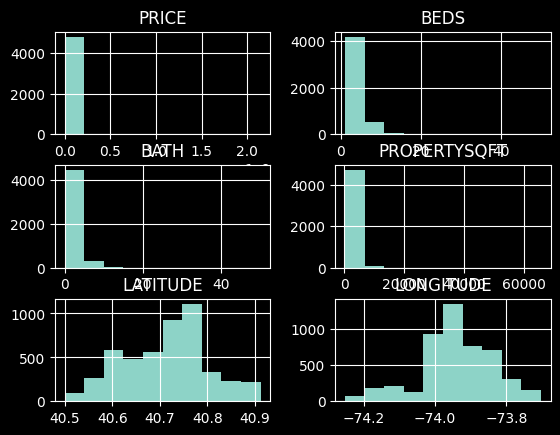

In [79]:
df.hist()

In [80]:
df.isna().mean().sort_values(ascending=False)

BROKERTITLE                    0.0
ADMINISTRATIVE_AREA_LEVEL_2    0.0
LATITUDE                       0.0
FORMATTED_ADDRESS              0.0
LONG_NAME                      0.0
STREET_NAME                    0.0
SUBLOCALITY                    0.0
LOCALITY                       0.0
MAIN_ADDRESS                   0.0
TYPE                           0.0
STATE                          0.0
ADDRESS                        0.0
PROPERTYSQFT                   0.0
BATH                           0.0
BEDS                           0.0
PRICE                          0.0
LONGITUDE                      0.0
dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>]], dtype=object)

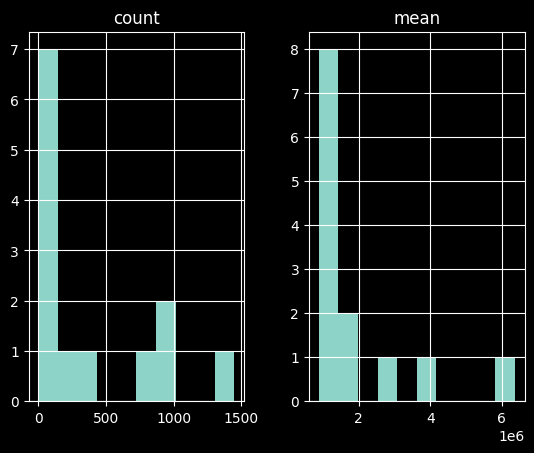

In [82]:
df.groupby('TYPE')['PRICE'].agg(['count','mean']).hist()

In [83]:
! pip install catboost

In [84]:
from catboost import CatBoostRegressor, Pool

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train, test = train_test_split(df,train_size=0.8,random_state=42)

In [87]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [88]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [90]:
X = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE',
    'BROKERTITLE', 'TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2',
    'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']

cat_features =['BROKERTITLE', 'TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']


y = ['PRICE']

In [91]:
# train = Pool(data=X, label=y, cat_features=cat_features)

In [92]:
model = CatBoostRegressor(cat_features=cat_features,
                        eval_metric='RMSE',
                        random_seed=42,
                        learning_rate=0.01,
                        verbose=100)

In [93]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 34878589.0348503	test: 5330922.0354808	best: 5330922.0354808 (0)	total: 8.57ms	remaining: 8.57s
100:	learn: 27297007.5761770	test: 4449329.5360010	best: 4449329.5360010 (100)	total: 767ms	remaining: 6.83s
200:	learn: 21391417.4278298	test: 4100157.1451679	best: 4100157.1451679 (200)	total: 1.52s	remaining: 6.05s
300:	learn: 16873631.1880851	test: 3997128.7625767	best: 3997128.7625767 (300)	total: 2.2s	remaining: 5.1s
400:	learn: 13356086.1763514	test: 3939862.0920144	best: 3939862.0920144 (400)	total: 2.89s	remaining: 4.32s
500:	learn: 10676153.2769144	test: 3914626.4548950	best: 3914626.4548950 (500)	total: 3.63s	remaining: 3.61s
600:	learn: 8651333.2952421	test: 3891134.0501612	best: 3891134.0501612 (600)	total: 4.36s	remaining: 2.89s
700:	learn: 7119253.6963506	test: 3846275.2137040	best: 3846262.1060431 (699)	total: 5.11s	remaining: 2.18s
800:	learn: 5965770.5120572	test: 3778736.5719761	best: 3778729.7156687 (799)	total: 6.39s	remaining: 1.59s
900:	learn: 5127141.4783758

MAE: 1301772.540643065
MSE: 13193928575948.967
RMSE: 3632344.7765801316
R^2: 0.534306813875698


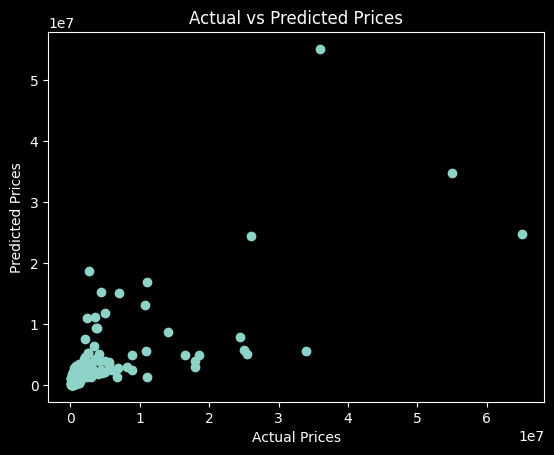

In [94]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(val[X])

y_true = val[y]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


plt.scatter(y_true, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [95]:
model.predict(test[X])

array([1.21890237e+06, 1.88564757e+06, 8.96457950e+05, 1.28876893e+07,
       5.97907180e+06, 1.40436283e+05, 1.72290986e+06, 2.21955865e+06,
       2.86976247e+05, 9.34560776e+05, 1.24682834e+05, 1.86468662e+06,
       1.05946943e+06, 1.28206324e+06, 6.70832342e+05, 1.88610148e+06,
       4.15800946e+06, 4.44783806e+06, 1.09714394e+06, 1.51654940e+06,
       1.53833847e+06, 1.24216586e+06, 5.20502088e+05, 7.78268585e+06,
       1.77390237e+06, 2.27113316e+07, 3.03434883e+06, 1.21131190e+06,
       1.62972155e+06, 6.94623771e+04, 9.23345058e+05, 1.80817530e+06,
       1.32651204e+06, 4.11297673e+05, 4.39705111e+05, 1.34383541e+06,
       2.23820283e+06, 1.94197237e+06, 1.42696903e+06, 9.75510012e+05,
       3.96112552e+06, 1.34157643e+06, 1.60608673e+06, 5.36703384e+05,
       1.04765218e+06, 2.33226620e+06, 9.69701468e+05, 1.78828607e+06,
       2.60451074e+04, 7.88633396e+05, 6.68037404e+05, 4.23070163e+05,
       1.85321425e+06, 1.92524577e+06, 4.99046111e+06, 1.93582896e+05,
      

In [96]:
test['pred'] = model.predict(test[X])

In [97]:
test.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,pred
2837,Brokered by American Dream Homes Realty Inc,House for sale,475000,3,2.0,1280.000000,912 Cranford Ave,"Bronx, NY 10466","912 Cranford AveBronx, NY 10466",United States,New York,Bronx County,The Bronx,Cranford Avenue,"912 Cranford Ave, Bronx, NY 10466, USA",40.903489,-73.843596,1.218902e+06
3635,Brokered by Winzone Realty Inc,Multi-family home for sale,1980000,3,3.0,3536.000000,2635 E 19th St,"Brooklyn, NY 11235","2635 E 19th StBrooklyn, NY 11235",United States,New York,Kings County,Brooklyn,East 19th Street,"2635 E 19th St, Brooklyn, NY 11235, USA",40.587547,-73.950103,1.885648e+06
3491,Brokered by RE MAX Boutique Realty,Condo for sale,1075000,3,4.0,2740.000000,4 Marisa Ct Unit 4A,"Bronx, NY 10465","4 Marisa Ct Unit 4ABronx, NY 10465",New York,Bronx County,The Bronx,East Bronx,4,"4 Marisa Ct #4a, Bronx, NY 10465, USA",40.812532,-73.823993,8.964579e+05
2488,Brokered by RE MAX Real Estate Professionals,Multi-family home for sale,3099000,36,16.0,12460.000000,5206 6th Ave,"Brooklyn, NY 11220","5206 6th AveBrooklyn, NY 11220",United States,New York,Kings County,Brooklyn,6th Avenue,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,1.288769e+07
1204,Brokered by Corcoran East Side,Townhouse for sale,10999000,5,7.0,2184.207862,132 W 81st St,"New York, NY 10024","132 W 81st StNew York, NY 10024",United States,New York,New York County,New York,West 81st Street,"132 W 81st St, New York, NY 10024, USA",40.783621,-73.975944,5.979072e+06


In [98]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [99]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [100]:
error(test['PRICE'],test['pred'])

1301335.7668735788
0.9352747604081285


In [101]:
test['error'] = test['pred'] - test['PRICE']

<Axes: >

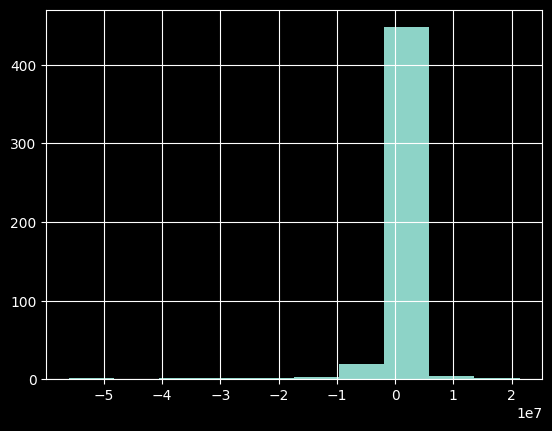

In [102]:
test['error'].hist()

In [103]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['PRICE'], test['pred']))
print(f'RMSE: {rmse}')

RMSE: 4177252.894595648


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(val[X])

y_true = val[y]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

# Вывод метрик
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')



MAE: 1301772.540643065
MSE: 13193928575948.967
RMSE: 3632344.7765801316
R^2: 0.534306813875698


In [105]:
y_preds = model.predict(test[X])


In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['PRICE'], y_preds)

17449441745407.72

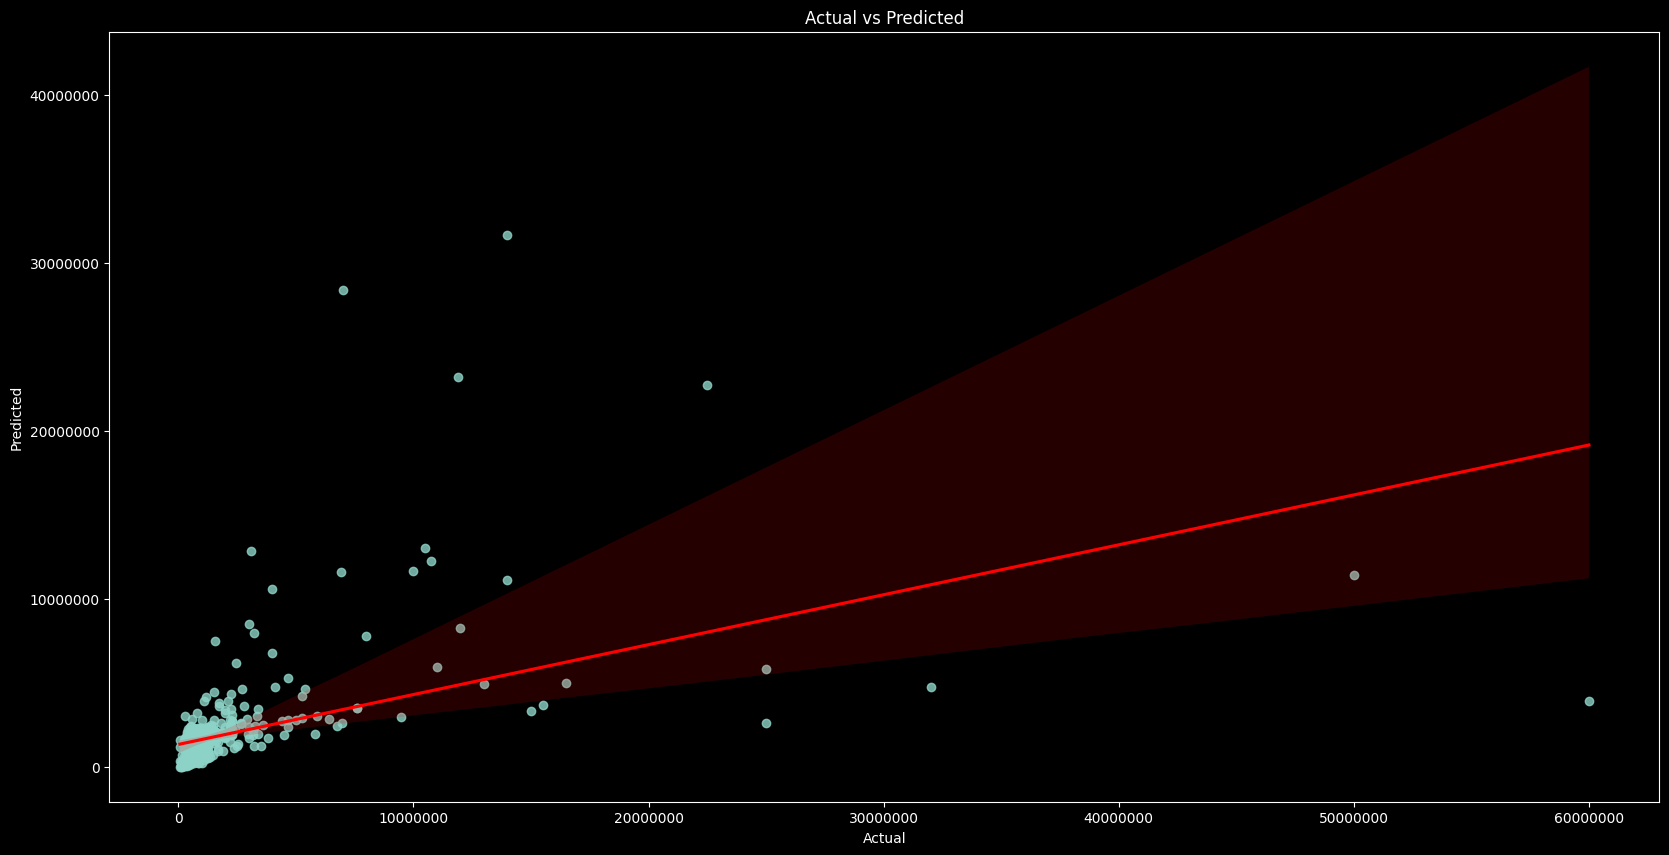

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=test['PRICE'], y=y_preds, x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')